<a href="https://colab.research.google.com/github/wardla2/Data-Science-Portfolio/blob/main/Project_4/25_1102_LWard_Project_4_Spotify_MusicPopularityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Music Popularity Prediction

## Problem Definitions


### Business outcomes

The global music industry depends on streaming platforms like Spotify to identify hits, tailor marketing campaigns, and recommend songs to users. The objective of this project is to develop a model that predicts the success of a new song by identifying the key factors driving a track's popularity, so that creatives and business stakeholders can make decisions that align with audiences' musical preferences.

### Data science problem

This project applies a supervised regression approach to predict song popularity using Spotify’s Top 200 Global chart data from 2020–2021. The goal is to train and validate a model that accurately estimates a new song’s popularity (minimizing RMSE) and identifies which audio features most strongly influence that popularity.

## Data Collection/Sources


The data is available AWS at https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv .

In [ ]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: P+XUlGgrlHEXkdGnS/q1drdVuUEwotxijcKnDUOLOT41YVx0HbaZ91cgRfeDbhnaPZbnu27BwAg=
x-amz-request-id: VXNYRDW2P5016B3N
Date: Mon, 03 Nov 2025 05:37:54 GMT
Last-Modified: Wed, 04 Oct 2023 17:23:56 GMT
ETag: "65b9875b11e0d7ea03ee2af024f45e99"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 738124
Server: AmazonS3



In [ ]:
!curl -s -O {url}

In [ ]:
ls -la

total 740
drwxr-xr-x 1 root root   4096 Nov  3 01:25 ./
drwxr-xr-x 1 root root   4096 Nov  3 01:21 ../
drwxr-xr-x 4 root root   4096 Oct 30 13:36 .config/
drwxr-xr-x 1 root root   4096 Oct 30 13:36 sample_data/
-rw-r--r-- 1 root root 738124 Nov  3 05:37 Spotify.csv


In [ ]:
!head -1 Spotify.csv | tr , '\n' | cat -n

     1	Index
     2	Highest Charting Position
     3	Number of Times Charted
     4	Week of Highest Charting
     5	Song Name
     6	Streams
     7	Artist
     8	Artist Followers
     9	Song ID
    10	Genre
    11	Release Date
    12	Weeks Charted
    13	Popularity
    14	Danceability
    15	Energy
    16	Loudness
    17	Speechiness
    18	Acousticness
    19	Liveness
    20	Tempo
    21	Duration (ms)
    22	Valence
    23	Chord


## Imports

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

## Data Cleaning


In [ ]:
# Load data 'Spotify.csv' from AWS S3

spotify_df = pd.read_csv( url )
spotify_df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
# Make a backup copy of the data frame

spotify_df_bak1 = spotify_df.copy()
spotify_df_bak1

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


In [ ]:
# Info

spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
# Describe basic stats

spotify_df.describe()

,Index,Highest Charting Position,Number of Times Charted
count,1556.000000,1556.000000,1556.000000
mean,778.500000,87.744216,10.668380
std,449.322824,58.147225,16.360546
min,1.000000,1.000000,1.000000
25%,389.750000,37.000000,1.000000
50%,778.500000,80.000000,4.000000
75%,1167.250000,137.000000,12.000000
max,1556.000000,200.000000,142.000000


In [ ]:
# Rows & columns

spotify_df.shape

(1556, 23)

In [ ]:
# Cells

spotify_df.size

35788

In [ ]:
# View null values

spotify_df.isna().sum()

,0
Index,0
Highest Charting Position,0
Number of Times Charted,0
Week of Highest Charting,0
Song Name,0
Streams,0
Artist,0
Artist Followers,0
Song ID,0
Genre,0


In [ ]:
# Count distinct elements in rows

spotify_df.nunique().sort_values(ascending = False).head(20)

,0
Index,1556
Streams,1556
Song Name,1556
Song ID,1517
Duration (ms),1486
Tempo,1461
Loudness,1394
Acousticness,965
Weeks Charted,775
Speechiness,772


In [ ]:
# Check if dataset oversamples for particular artists

spotify_df['Artist'].value_counts().head(30)


,count
Artist,
Taylor Swift,52
Justin Bieber,32
Lil Uzi Vert,32
Juice WRLD,30
Pop Smoke,29
BTS,29
Bad Bunny,28
Eminem,22
The Weeknd,21


In [ ]:
# Drop Taylor Swift songs (case-insensitive match)

spotify_df = spotify_df[~spotify_df['Artist'].str.contains('taylor swift', case=False, na=False)]

In [ ]:
# Drop non-predictive columns

cols_to_drop = [
  'Index', 'Highest Charting Position', 'Number of Times Charted',
  'Week of Highest Charting', 'Streams', 'Weeks Charted',
   'Song Name', 'Song ID', 'Artist Followers', 'Genre', 'Release Date'
]

spotify_df = spotify_df.drop(columns=cols_to_drop, errors='ignore')
spotify_df

,Artist,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,Måneskin,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,The Kid LAROI,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,Olivia Rodrigo,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,Ed Sheeran,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,Lil Nas X,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...
1550,"Gradur, Heuss L'enfoiré",62,0.932,0.778,-3.384,0.0638,0.212,0.168,124.996,188613,0.933,A#/Bb
1551,Dua Lipa,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,Jorge & Mateus,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,Camila Cabello,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D


In [ ]:
# Normalize and one-hot encode Chord column

# Normalize chords like "C#/Db" -> "C#"
spotify_df['Chord'] = spotify_df['Chord'].apply(lambda x: x.split('/')[0].strip() if isinstance(x, str) else x)

# Create dummy variables (one-hot encoding)
spotify_df = pd.get_dummies(spotify_df, columns=['Chord'], prefix='Chord', dummy_na=False)
spotify_df = spotify_df.drop(columns=['Chord_'])

In [ ]:
# Convert numeric features from object to float
numeric_cols = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)',
    'Valence','Popularity']

for col in numeric_cols:
    spotify_df[col] = pd.to_numeric(spotify_df[col], errors='coerce')

spotify_df

,Artist,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),...,Chord_B,Chord_C,Chord_C#,Chord_D,Chord_D#,Chord_E,Chord_F,Chord_F#,Chord_G,Chord_G#
0,Måneskin,100.0,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,...,True,False,False,False,False,False,False,False,False,False
1,The Kid LAROI,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,...,False,False,True,False,False,False,False,False,False,False
2,Olivia Rodrigo,99.0,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,...,False,False,False,False,False,False,False,False,False,False
3,Ed Sheeran,98.0,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,...,True,False,False,False,False,False,False,False,False,False
4,Lil Nas X,96.0,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,"Gradur, Heuss L'enfoiré",62.0,0.932,0.778,-3.384,0.0638,0.21200,0.1680,124.996,188613.0,...,False,False,False,False,False,False,False,False,False,False
1551,Dua Lipa,79.0,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,...,False,False,False,False,False,False,False,False,False,False
1552,Jorge & Mateus,66.0,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,...,True,False,False,False,False,False,False,False,False,False
1553,Camila Cabello,81.0,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
# Check for null values

spotify_df.isna().sum()

,0
Artist,0
Popularity,11
Danceability,11
Energy,11
Loudness,11
Speechiness,11
Acousticness,11
Liveness,11
Tempo,11
Duration (ms),11


In [ ]:
# Encode artists

artist_freq = spotify_df['Artist'].value_counts()
spotify_df['Artist_encoded'] = spotify_df['Artist'].map(artist_freq)
spotify_df = spotify_df.drop(columns=['Artist'])

In [ ]:
# Drop rows with missing predictor values

spotify_df = spotify_df.dropna(subset=numeric_cols)

# Check again for null values

spotify_df.isna().sum()

,0
Popularity,0
Danceability,0
Energy,0
Loudness,0
Speechiness,0
Acousticness,0
Liveness,0
Tempo,0
Duration (ms),0
Valence,0


In [ ]:
spotify_df.shape

(1493, 23)

###Backup 2

In [ ]:
# Make a backup copy of the cleaned data frame

spotify_df_cleaned = spotify_df.copy()
spotify_df_cleaned_bak2 = spotify_df_cleaned
spotify_df_cleaned

,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,...,Chord_C,Chord_C#,Chord_D,Chord_D#,Chord_E,Chord_F,Chord_F#,Chord_G,Chord_G#,Artist_encoded
0,100.0,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,...,False,False,False,False,False,False,False,False,False,4
1,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,...,False,True,False,False,False,False,False,False,False,9
2,99.0,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,...,False,False,False,False,False,False,False,False,False,12
3,98.0,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,...,False,False,False,False,False,False,False,False,False,9
4,96.0,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,...,False,False,False,True,False,False,False,False,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,62.0,0.932,0.778,-3.384,0.0638,0.21200,0.1680,124.996,188613.0,0.933,...,False,False,False,False,False,False,False,False,False,1
1551,79.0,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,...,False,False,False,False,False,False,False,False,False,15
1552,66.0,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,...,False,False,False,False,False,False,False,False,False,3
1553,81.0,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,...,False,False,True,False,False,False,False,False,False,4


## Exploratory Data Analysis


###Check for feature correlation

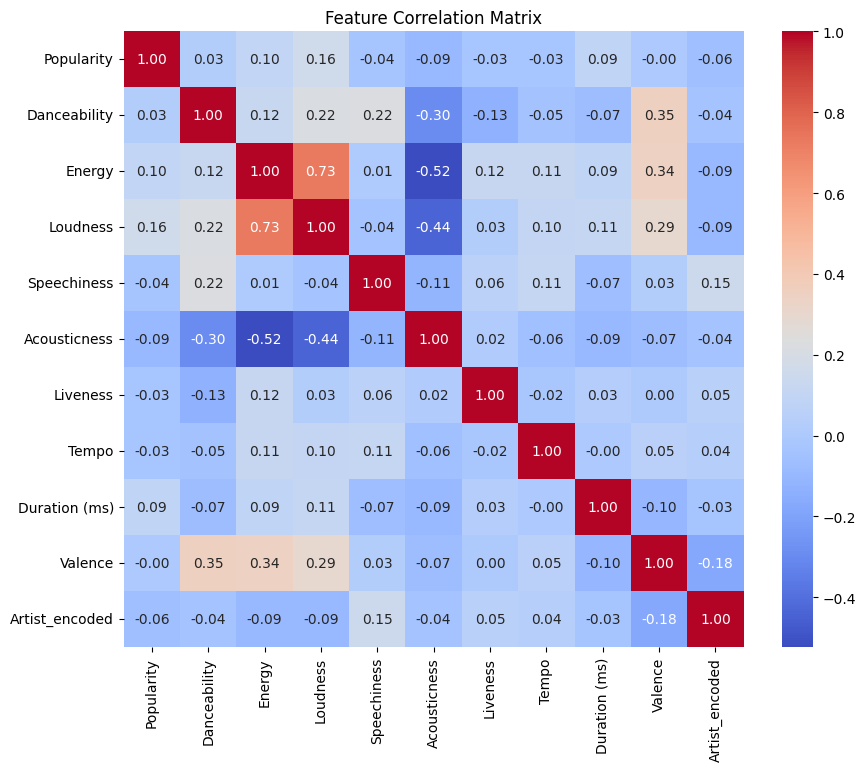

In [ ]:
# Check for similar features

import seaborn as sns

corr = spotify_df_cleaned[['Popularity','Danceability','Energy','Loudness','Speechiness',
                   'Acousticness','Liveness','Tempo','Duration (ms)',
                   'Valence','Artist_encoded']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

## Processing



### Split data into train / test

In [ ]:
# Target variable
y = spotify_df_cleaned['Popularity']

# Feature matrix: all columns except target
X = spotify_df_cleaned.drop(columns=['Popularity'], errors='ignore')

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Feature columns:", list(X.columns))

X shape: (1493, 22)
y shape: (1493,)
Feature columns: ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence', 'Chord_A', 'Chord_A#', 'Chord_B', 'Chord_C', 'Chord_C#', 'Chord_D', 'Chord_D#', 'Chord_E', 'Chord_F', 'Chord_F#', 'Chord_G', 'Chord_G#', 'Artist_encoded']


### Random Forest Regression Model

In [ ]:
# Choose number of trees - Robert's code

num_trees = range(10,60,10)
cv_loops = 100
rmse_results = np.zeros(len(num_trees))
std_results = np.zeros(len(num_trees))

for n, trees in enumerate(num_trees):
  rmse_cv = np.zeros(cv_loops)
  np.random.seed(42)
  for i in range(cv_loops):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    rfModel = RandomForestRegressor( n_estimators=trees )
    rfModel.fit(X_train, y_train)
    y_pred_rf = rfModel.predict(X_test)
    rmse_cv[i] = np.sqrt(mean_squared_error(y_test, y_pred_rf))

  print(trees,' trees finished.')
  rmse_results[n] = rmse_cv.mean()
  std_results[n] = rmse_cv.std()

10  trees finished.
20  trees finished.
30  trees finished.
40  trees finished.
50  trees finished.


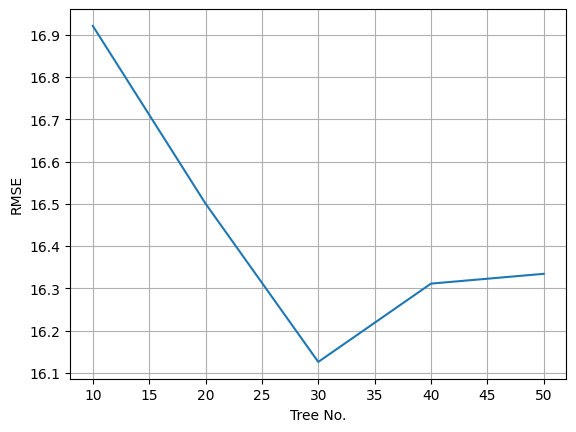

In [ ]:
# Plot RMSE by number of estimators (trees)

plt.plot(num_trees, rmse_results)
plt.xlabel('Tree No.')
plt.ylabel('RMSE')
plt.grid()

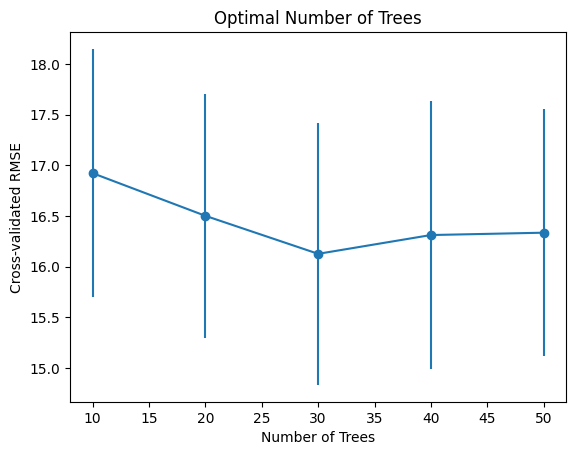

In [ ]:
# Optimal number of trees is where RMSE plot flattens: 40

plt.errorbar(num_trees, rmse_results, yerr=std_results, fmt='-o')
plt.xlabel('Number of Trees')
plt.ylabel('Cross-validated RMSE')
plt.title('Optimal Number of Trees')
plt.show()

In [ ]:
# Initialize Random Forest model

rf_model = RandomForestRegressor(
  n_estimators=40,
  max_depth=None,
  random_state=42,
)


In [ ]:
# Cross-validated RMSE (neg_mean_squared_error gives negative values)

def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(
        model, X, y, scoring="neg_mean_squared_error", cv=5
    ))
    return rmse.mean()

rf_rmse = rmse_cv(rf_model, X_train, y_train)

print(f"Cross-validated RMSE (Random Forest): {rf_rmse:.3f}")


Cross-validated RMSE (Random Forest): 16.419


In [ ]:
# Fit
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, y_pred_rf)   # returns MSE
rf_test_rmse = np.sqrt(mse)                   # take sqrt > RMSE

print(f"Test RMSE (Random Forest): {rf_test_rmse:.3f}")

Test RMSE (Random Forest): 16.233


## Data Visualization/Communication of Results


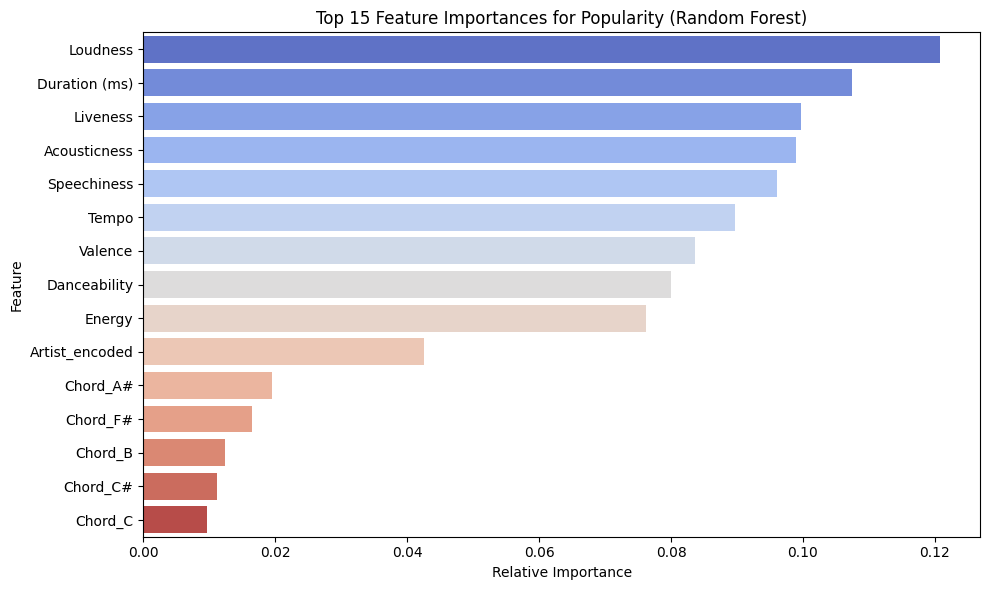

In [ ]:
# Get feature importance from trained Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

# Combine into DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feat_imp.head(15),
    hue='Feature',
    palette='coolwarm',
    dodge=False,
    legend=False
)
plt.title('Top 15 Feature Importances for Popularity (Random Forest)')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()